In [34]:
import pandas as pd

url = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
df = pd.read_csv(url)
df.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [35]:
df['finalizado'] = df['nao_finalizado'].map({1: 0, 0: 1})
df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


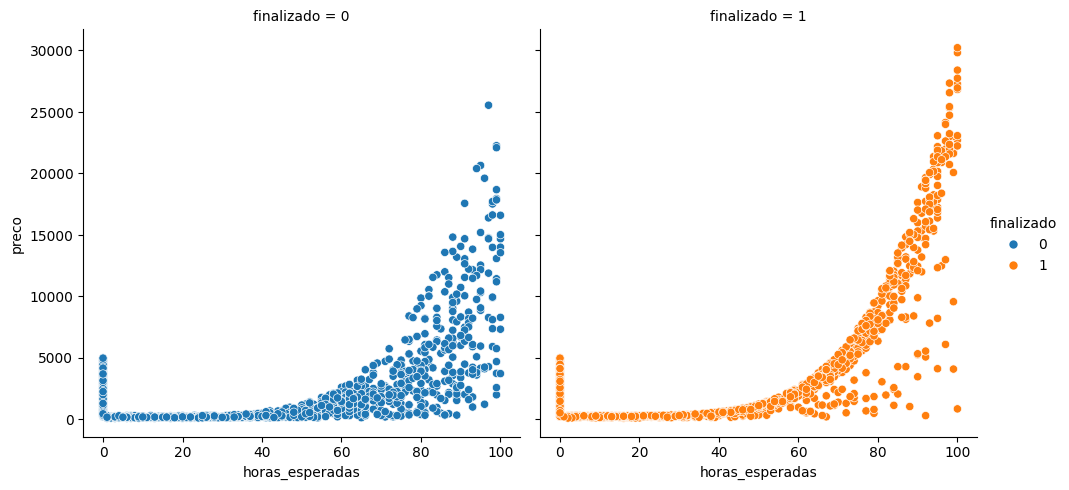

In [36]:
import seaborn as sns

sns.relplot(x='horas_esperadas', y='preco', data=df, hue='finalizado', col='finalizado')

In [37]:
df.query('horas_esperadas > 0')
df.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


In [38]:
x = df[['horas_esperadas', 'preco']]
y = df['finalizado']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, stratify=y)

print(f"Treinaremos com {len(raw_train_x)} elementos")
print(f"Testaremos com {len(raw_test_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model = SVC(gamma='auto')
model.fit(train_x, train_y)
accuracy = accuracy_score(test_y, model.predict(test_x)) * 100
print(f"A acurácia foi de {accuracy:.2f}%")

Treinaremos com 1842 elementos
Testaremos com 615 elementos
A acurácia foi de 62.93%


In [40]:
predic = test_y.sum() / len(test_y) * 100
print(f"A acurácia do modelo de base foi de {predic:.2f}%")

A acurácia do modelo de base foi de 52.52%


In [41]:
date_col1 = test_x[:, 0]  # primeira coluna
date_col2 = test_x[:, 1]  # segunda coluna

x_min = date_col1.min()
x_max = date_col1.max()
y_min = date_col2.min()
y_max = date_col2.max()

print(f"X min: {x_min}, X max: {x_max}")
print(f"Y min: {y_min}, Y max: {y_max}")


X min: -1.402344611386832, X max: 1.7502608052487671
Y min: -0.618179177708706, Y max: 4.270119852337827


In [42]:
import numpy as np

pixel = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)

In [43]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[-1.40234461, -0.61817918],
       [-1.37081856, -0.61817918],
       [-1.3392925 , -0.61817918],
       ...,
       [ 1.6872087 ,  4.22123686],
       [ 1.71873475,  4.22123686],
       [ 1.75026081,  4.22123686]], shape=(10100, 2))

In [44]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], shape=(100, 101))

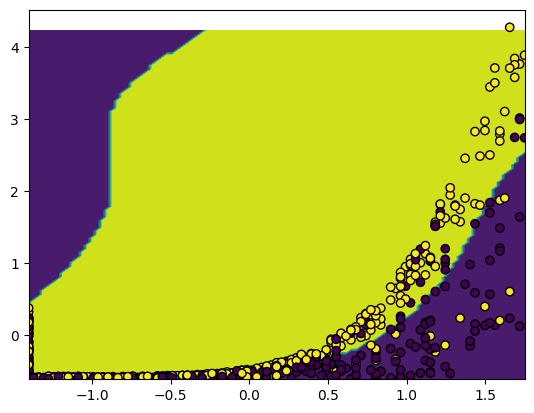

In [45]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z)
plt.scatter(date_col1, date_col2, c=test_y, edgecolors='k')